In [16]:
from color_code_stim import ColorCode, NoiseModel

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# ColorCode object and its attributes

## Initialization of a ColorCode object

Currently support only the logical idling gate of a triangular color code, which is preceded by a logical-$Z$ initialization (to its $+1$ eigenstate) and followed by a logical-$Z$ measurement.

ex) 5-round idling gate of distance-5 color code under circuit-level noise of strength 1e-3.

In [17]:
# Define noise model
noise_model = NoiseModel.uniform_circuit_noise(1e-3)

# Alternatively, you can input individual noise rates as:
# noise_model = NoiseModel(
#     reset=1e-3,
#     meas=1e-3,
#     cnot=1e-3,
#     idle=1e-3,
# )

In [24]:
colorcode = ColorCode(
    # Circuit parameters
    d=3,
    rounds=3,
    circuit_type="tri",
    cnot_schedule="tri_optimal",  # Default CNOT schedule, optimized for triangular color codes
    temp_bdry_type="Z",  # Pauli type of the temporal boundaries (default: 'Z')
    noise_model=noise_model,  # Noise model
    # Whether to set logical initialization and measurement to be noiseless
    perfect_logical_initialization=False,
    perfect_logical_measurement=False,
    perfect_first_syndrome_extraction=False,
)

Set `superdense=True` if you want to use the superdense syndrome extraction circuit instead of the space multiplexing circuit. See [arXiv:2312.08813](https://arxiv.org/abs/2312.08813) for more details.

## Tanner graph of the code

The tanner graph is stored as an `igraph.Graph` object with vertices corresponding to data qubits and checks. Data qubits and X/Z-type checks can be distinguished by the `"pauli"` attribute (`None` for data qubits, `"X"` for X-type checks, and `"Z"` for Z-type checks). Checks have the `"color"` attribute as well.

The graph contains two types of edges: `kind="tanner"` and `kind="lattice"`. Edges with `kind="tanner"` are actual edges in the tanner graph, connecting data qubits and checks. Edges with `kind="lattice"` are edges in the color code lattice and have the `"color"` attribute.

See the documentation of [python-igraph](https://python.igraph.org/en/main/index.html) for details on how to use this.

In [25]:
graph = colorcode.tanner_graph
print("Total number of vertices:", len(graph.vs))
print("Total number of edges:", len(graph.es))
print("\nX-type checks:")
for v in graph.vs.select(pauli="X"):
    print(v)
print("\nZ-type checks:")
for v in graph.vs.select(pauli="Z"):
    print(v)
print("\nData qubits:")
for v in graph.vs.select(pauli=None):
    print(v)
print("\nSome tanner graph edges:")
for e in graph.es.select(kind="tanner")[:5]:
    print(e, f": Connecting vertices {e.source} and {e.target}")
print("\nSome lattice edges:")
for e in graph.es.select(kind="lattice")[:5]:
    print(e, f": Connecting vertices {e.source} and {e.target}")

Total number of vertices: 13
Total number of edges: 33

X-type checks:
igraph.Vertex(<igraph.Graph object at 0x12e909750>, 3, {'x': 9, 'y': 0, 'qid': 3, 'pauli': 'X', 'color': 'g', 'obs': False, 'boundary': 'r', 'name': '9-0-X', 'face_x': 8, 'face_y': 0})
igraph.Vertex(<igraph.Graph object at 0x12e909750>, 6, {'x': 3, 'y': 1, 'qid': 6, 'pauli': 'X', 'color': 'b', 'obs': False, 'boundary': 'g', 'name': '3-1-X', 'face_x': 2, 'face_y': 1})
igraph.Vertex(<igraph.Graph object at 0x12e909750>, 11, {'x': 9, 'y': 2, 'qid': 11, 'pauli': 'X', 'color': 'r', 'obs': False, 'boundary': 'b', 'name': '9-2-X', 'face_x': 8, 'face_y': 2})

Z-type checks:
igraph.Vertex(<igraph.Graph object at 0x12e909750>, 2, {'x': 7, 'y': 0, 'qid': 2, 'pauli': 'Z', 'color': 'g', 'obs': False, 'boundary': 'r', 'name': '7-0-Z', 'face_x': 8, 'face_y': 0})
igraph.Vertex(<igraph.Graph object at 0x12e909750>, 5, {'x': 1, 'y': 1, 'qid': 5, 'pauli': 'Z', 'color': 'b', 'obs': False, 'boundary': 'g', 'name': '1-1-Z', 'face_x': 2, 

## Circuit

The circuit is stored as a `stim.Circuit` object.

In [26]:
circuit = colorcode.circuit

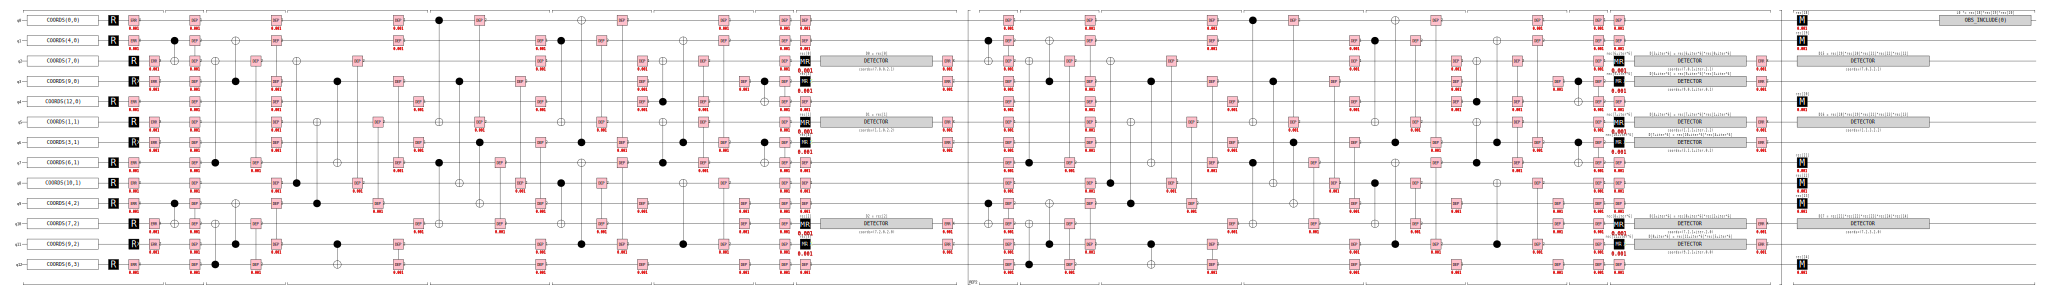

In [ ]:
circuit.diagram("timeline-svg")

## Detectors

Detectors have their own detector IDs.

A detector is specified by the round (integer) it belongs to and the ancillary qubit (igraph.Vertex) involved in it.

In [30]:
num_detectors = colorcode.circuit.num_detectors
print("Number of detectors:", num_detectors)
print("Some examples of detectors:")
for det_id in range(10):
    anc, rnd = colorcode.get_detector(det_id)
    print(f"id = {det_id}: round {rnd}, ancillary qubit {anc}")

Number of detectors: 18
Some examples of detectors:
id = 0: round 0, ancillary qubit igraph.Vertex(<igraph.Graph object at 0x12e909750>, 2, {'x': 7, 'y': 0, 'qid': 2, 'pauli': 'Z', 'color': 'g', 'obs': False, 'boundary': 'r', 'name': '7-0-Z', 'face_x': 8, 'face_y': 0})
id = 1: round 0, ancillary qubit igraph.Vertex(<igraph.Graph object at 0x12e909750>, 5, {'x': 1, 'y': 1, 'qid': 5, 'pauli': 'Z', 'color': 'b', 'obs': False, 'boundary': 'g', 'name': '1-1-Z', 'face_x': 2, 'face_y': 1})
id = 2: round 0, ancillary qubit igraph.Vertex(<igraph.Graph object at 0x12e909750>, 10, {'x': 7, 'y': 2, 'qid': 10, 'pauli': 'Z', 'color': 'r', 'obs': False, 'boundary': 'b', 'name': '7-2-Z', 'face_x': 8, 'face_y': 2})
id = 3: round 1, ancillary qubit igraph.Vertex(<igraph.Graph object at 0x12e909750>, 2, {'x': 7, 'y': 0, 'qid': 2, 'pauli': 'Z', 'color': 'g', 'obs': False, 'boundary': 'r', 'name': '7-0-Z', 'face_x': 8, 'face_y': 0})
id = 4: round 1, ancillary qubit igraph.Vertex(<igraph.Graph object at 0x1

## Decomposed detector error models for the concatenated MWPM decoder

The **concatenated MWPM decoder** works by decomposing the detector error model (DEM) into two matchable DEMs, **"restricted DEM"** and **"monochromatic DEM"**, for each color. These individual DEMs can be accessed as follows. 

In [31]:
# Restricted & monochromatic DEMs for a specific color
# stim.DetectorErrorModel objects
dem1, dem2 = colorcode.get_decomposed_dems("r")

In [32]:
# More advanced usage:
# DemDecomp object
dem_decomp = colorcode.dems_decomposed["r"]
dem_decomp

<DemDecomp object with color='r', Hs[0].shape=(18, 30), Hs[1].shape=(48, 81)>

In [33]:
print(dem_decomp.__doc__)


Decomposition of a detector error model (DEM) into two stages for concatenated color
code decoding.

This class decomposes a detector error model into a restricted DEM (stage 1) and
a monochromatic DEM (stage 2) for a specific color in the color code.

Attributes
----------
color : one of {"r", "g", "b"}
    The color for which the DEM is decomposed.
_dems : 2-tuple of stim.DetectorErrorModel
    The decomposed detector error models for stages 1 and 2.
    Can be accessed simply by `self[0]` and `self[1]`.
dems_symbolic : 2-tuple of _DemSymbolic
    Symbolic representations of the decomposed DEMs.
Hs : 2-tuple of csc_matrix (bool)
    Parity check matrices for stages 1 and 2.
probs : 2-tuple of 1D numpy array (float)
    Error probabilities for stages 1 and 2.
org_dem : stim.DetectorErrorModel
    The original detector error model.
org_prob : 1D numpy array (float)
    Error probabilities of the original DEM.
error_map_matrices : 2-tuple of csr_matrix (bool)
    Matrices mapping error

## Save & Load

`ColorCode` supports save & load functions. However, some attributes of `python-igraph` objects cannot be pickled, so un-picklable attributes are removed when saving and retrieved when loading.

In [34]:
# Save
colorcode.save("colorcode.pkl")

In [35]:
# Load
colorcode = ColorCode.load("colorcode.pkl")

# Sampling & Decoding with the Concatenated MWPM decoder

## Shortcut: sampling & decoding & stats at once

In [37]:
noise_model = NoiseModel.uniform_circuit_noise(1e-3)
colorcode = ColorCode(
    d=5,
    rounds=5,
    noise_model=noise_model,
)

In [ ]:
num_fails, info = colorcode.simulate(
    10000,  # Number of shots
    full_output=True,  # Whether to get additional information on decoding outputs
    verbose=True,
    seed=42,
)

Sampling...
Decoding...
First-round decoding:
    > logical class 0, color r...
    > logical class 0, color g...
    > logical class 0, color b...
Second-round decoding:
    > logical class 0, color r...
    > logical class 0, color g...
    > logical class 0, color b...
Postprocessing...


In [44]:
info

{'best_colors': array([0, 0, 0, ..., 0, 0, 0], shape=(10000,)),
 'weights': array([ 5.66392937, 11.21063826,  0.        , ...,  0.        ,
         0.        , 12.65120943], shape=(10000,)),
 'error_preds': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],
       shape=(10000, 549)),
 'stats': (0.003429469412556193, 0.0014688881371966588),
 'fails': array([False, False, False, ..., False, False, False], shape=(10000,))}

In [ ]:
print("Number of failures =", num_fails)
pfail, delta_pfail = info["stats"]
print(f"pfail = {pfail:.2e} +- {delta_pfail:.2e} (95% confidence interval)")
# To change the significance level, set `alpha` parameter in `simulate()`

Number of failures = 31
pfail = 3.43e-03 +- 1.47e-03 (95% confidence interval)


## Step-by-step

### Sampling detector and observable outcomes

In [48]:
det, obs = colorcode.sample(10000, seed=42)

`det[i,j]` is `True` if and only if the detector with id `j` in the `i`th sample has an outcome of $-1$.

In [49]:
det

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], shape=(10000, 90))

`obs[i]` is `True` if and only if the logical observable of the `i`th sample has an outcome of $-1$.

(`obs` is 2D for circuits with multiple observables, such as `circuit_type=rec`.)

In [50]:
obs

array([False, False, False, ..., False, False, False], shape=(10000,))

### Decode using the concatenated MWPM decoder

In [52]:
preds_obs, info = colorcode.decode(det, verbose=True, full_output=True)

First-round decoding:
    > logical class 0, color r...
    > logical class 0, color g...
    > logical class 0, color b...
Second-round decoding:
    > logical class 0, color r...
    > logical class 0, color g...
    > logical class 0, color b...


In [53]:
preds_obs  # Predictions of logical observables

array([False, False, False, ..., False, False, False], shape=(10000,))

In [54]:
list(info.keys())

['best_colors', 'weights', 'error_preds']

In [55]:
info["best_colors"]  # Selected best colors (0: red, 1: green, 2: blue)

array([0, 0, 0, ..., 0, 0, 0], shape=(10000,))

In [56]:
info["weights"]  # Log-likelihood ratio weights of predictions

array([ 5.66392937, 11.21063826,  0.        , ...,  0.        ,
        0.        , 12.65120943], shape=(10000,))

**Check failures**

In [59]:
import numpy as np

fails = np.logical_xor(obs, preds_obs)
fails

array([False, False, False, ..., False, False, False], shape=(10000,))

In [60]:
print("Number of failures:", np.sum(fails))

Number of failures: 31


## Comparative decoding

`ColorCode` also supports the comparative decoding method, which works by running the
concatenated MWPM decoder multiple times for different logical classes and selecting
the lowest-weight correction.

In [ ]:
noise_model = NoiseModel.uniform_circuit_noise(1e-3)
colorcode = ColorCode(
    circuit_type="tri",
    d=5,
    rounds=5,
    noise_model=noise_model,
    comparative_decoding=True,
)
num_fails, info = colorcode.simulate(1000, verbose=True, full_output=True, seed=42)

Sampling...
Decoding...
First-round decoding:
    > logical class 0, color r...
    > logical class 0, color g...
    > logical class 0, color b...
    > logical class 1, color r...
    > logical class 1, color g...
    > logical class 1, color b...
Second-round decoding:
    > logical class 0, color r...
    > logical class 0, color g...
    > logical class 0, color b...
    > logical class 1, color r...
    > logical class 1, color g...
    > logical class 1, color b...
Postprocessing...


In [ ]:
print(info["logical_gaps"][:20])

[14.31484902 12.45220578  5.29773771 19.02386925 19.02386925 19.02386925
 19.02386925  8.92215486  9.74702778  6.43714454 19.02386925 19.02386925
 19.02386925  8.34686489 17.64683864  9.94299055 19.02386925 19.02386925
 19.02386925 14.31484902]


# Visualization

## Tanner graph & Lattice

<Axes: >

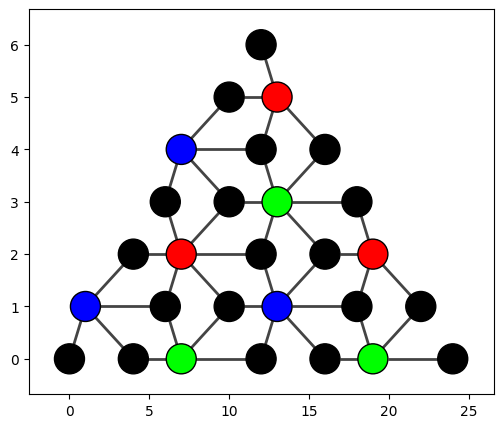

In [68]:
# qubits: black, checks: red/green/blue

colorcode = ColorCode(d=5, rounds=1, circuit_type="tri", p_bitflip=1e-2)
colorcode.draw_tanner_graph(
    show_axes=True,
    pauli="Z"  # set 'both' to show both X and Z checks
)

<Axes: >

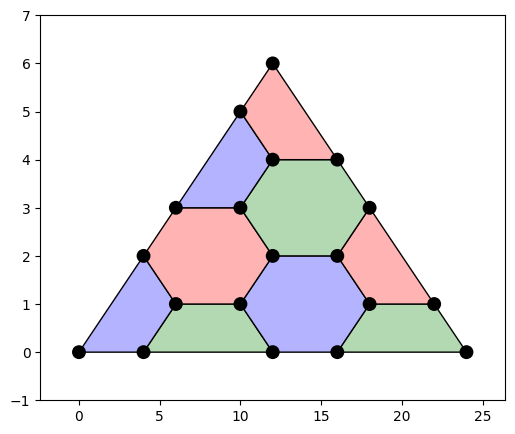

In [69]:
colorcode.draw_lattice(show_axes=True)

## Identifying and visualizing errors on the lattice

Only supported for `circuit_type="tri"` and `circuit_type="rec"` with `rounds=1` under bit-flip noise.

In [72]:
noise_model = NoiseModel(bitflip=2e-2)
colorcode = ColorCode(d=7, rounds=1, circuit_type="tri", noise_model=noise_model)

det, obs, err = colorcode.sample_with_errors(shots=10000, seed=42)
pred, extra_outputs = colorcode.decode(det, full_output=True)
fail = obs ^ pred
failed_samples = np.nonzero(fail)[0]
print(failed_samples)

[2118 3623 6029 8024 9710]


In [74]:
idx = failed_samples[0]
err_qubits = colorcode.errors_to_qubits(err[idx])
corr_qubits = colorcode.errors_to_qubits(extra_outputs["error_preds"][idx])
err_qubits = np.nonzero(err_qubits)[0]
corr_qubits = np.nonzero(corr_qubits)[0]
violated_faces = np.nonzero(det[idx])[0]
print("Qubits with bit-flip errors:", err_qubits)
print("Prediction (failed):", corr_qubits)
print("Faces with violated stabilizers:", violated_faces)

Qubits with bit-flip errors: [ 0 19 23 33]
Prediction (failed): [13 31 36]
Faces with violated stabilizers: [ 3  6 13 15 16 17]


<Axes: >

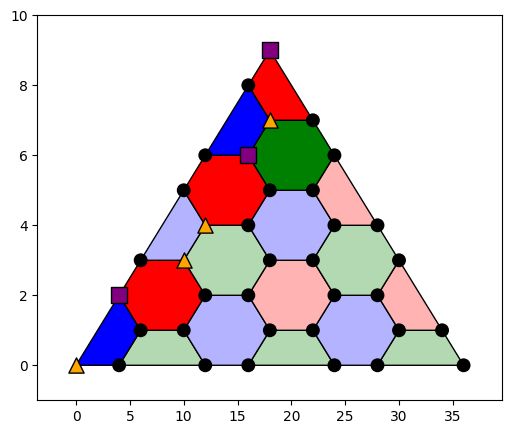

In [75]:
colorcode.draw_lattice(
    show_axes=True,
    highlight_qubits=err_qubits,  # orange triangles
    highlight_qubits2=corr_qubits,  # purple rectangles
    highlight_faces=violated_faces,  # dark faces
)